In [27]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [28]:
obs_base = os.path.join('/','media','arturo','T9','Data','Italy', 'stations', 'Italy_raingauges', 'QC_MIX')
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite','5_DOWN')

In [29]:
def load_relative_error(product):
    sat_dir = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'SAT_{product}_relative_error.csv')
    RE_DATA_SAT = pd.read_csv(sat_dir)
    
    DAT_SAT = RE_DATA_SAT.values.flatten()
    DAT_SAT = DAT_SAT[~np.isnan(DAT_SAT)]

    down_dir = os.path.join(obs_base, 'DATA_1dy', 'RE_ENSEMBLE_SAT', f'DOWN_{product}_relative_error.csv')
    RE_DATA_DOWN = pd.read_csv(down_dir)
    
    DATA_DOWN = RE_DATA_DOWN.values.flatten()
    DATA_DOWN = DATA_DOWN[~np.isnan(DATA_DOWN)]
    
    return DAT_SAT, DATA_DOWN

In [31]:
PERSIANN_SAT, PERSIANN_DOWN = load_relative_error('PERSIANN')
IMERG_SAT, IMERG_DOWN = load_relative_error('IMERG')
CHIRPS_SAT, CHIRPS_DOWN = load_relative_error('CHIRPS')
MSWEP_SAT, MSWEP_DOWN = load_relative_error('MSWEP')
GSMaP_SAT, GSMaP_DOWN = load_relative_error('GSMaP')
ERA5_SAT, ERA5_DOWN = load_relative_error('ERA5')
CMORPH_SAT, CMORPH_DOWN = load_relative_error('CMORPH')
ENSEMBLE_SAT, ENSEMBLE_DOWN = load_relative_error('ensemble')

In [32]:
colors = ['royalblue','r', 'g', 'c', 'y', 'purple', 'orange', 'cyan']

Text(0.5, 1.0, 'Tr = 50 yrs')

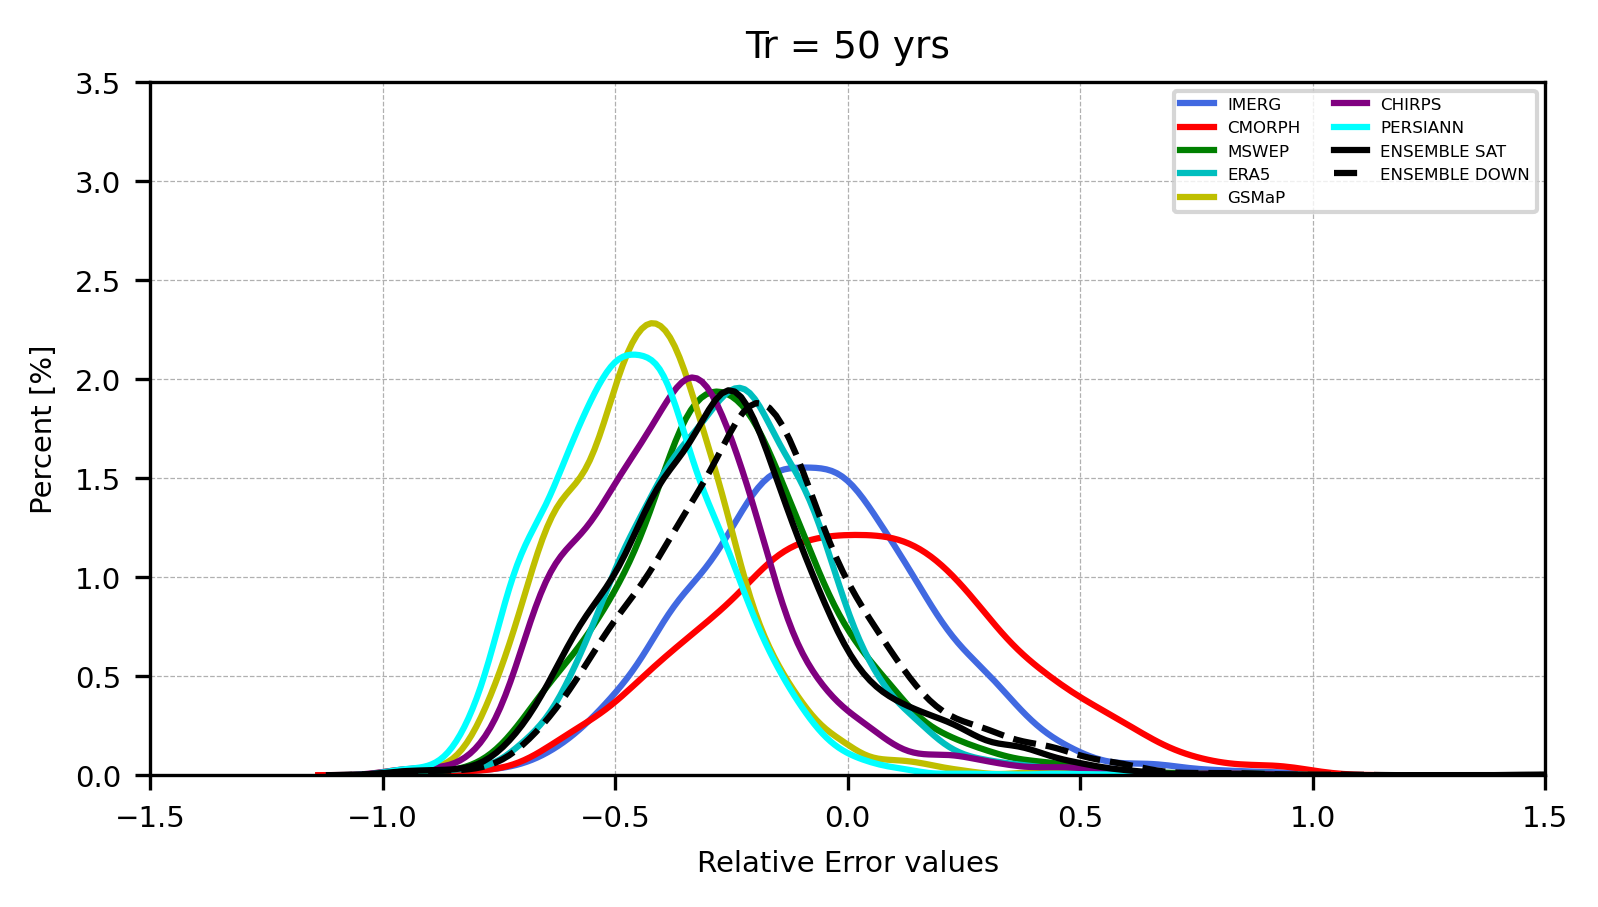

In [40]:
fig = plt.figure(figsize=(6,3),dpi=300)
gs = gridspec.GridSpec(1,1)

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 0])

sns.kdeplot(IMERG_SAT,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG')
# sns.kdeplot(IMERG_DOWN,color=colors[0], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG DOWN')

sns.kdeplot(CMORPH_SAT,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CMORPH')
# sns.kdeplot(CMORPH_DOWN,color=colors[1], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CMORPHd')

sns.kdeplot(MSWEP_SAT,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'MSWEP')
# sns.kdeplot(MSWEP_DOWN,color=colors[2], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'MSWEPd')

sns.kdeplot(ERA5_SAT,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ERA5')
# sns.kdeplot(ERA5_DOWN,color=colors[3], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ERA5d')

sns.kdeplot(GSMaP_SAT,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaP')
# sns.kdeplot(GSMaP_DOWN,color=colors[4], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaPd')

sns.kdeplot(CHIRPS_SAT,color=colors[5],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CHIRPS')
# sns.kdeplot(CHIRPS_DOWN,color=colors[5], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CHIRPSd')

sns.kdeplot(PERSIANN_SAT,color=colors[7],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'PERSIANN')
# sns.kdeplot(PERSIANN_DOWN,color=colors[7], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'PERSIANN DOWN')

sns.kdeplot(ENSEMBLE_SAT,color='k',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE SAT')
sns.kdeplot(ENSEMBLE_DOWN,color='k', linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE DOWN')

ax1.set_ylabel('Percent [%]',fontsize=7)
ax1.set_xlabel('Relative Error values',fontsize=7)
ax1.legend(fontsize=4, loc=0, ncol=2)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,3.5)
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title(f'Tr = 50 yrs',fontsize=9, loc='Center')